In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fraud-detection/fraudTrain.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.is_fraud.value_counts()

,count
is_fraud,
0,1289169
1,7506


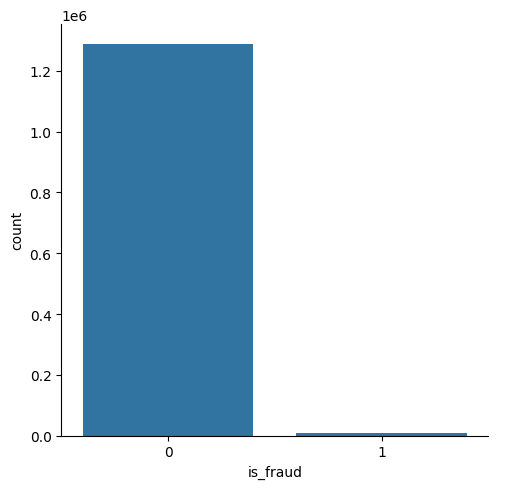

In [ ]:
sns.catplot(x="is_fraud", data=df, kind="count")

([<matplotlib.patches.Wedge at 0x782637538160>,
 [Text(-1.0998181131964657, 0.02000294690705531, 'Not Fraud'),
  Text(1.0998181149229591, -0.020002851979370503, 'Fraud')],
 [Text(-0.5999007890162539, 0.010910698312939258, '99.42%'),
  Text(0.5999007899579777, -0.010910646534202092, '0.58%')])

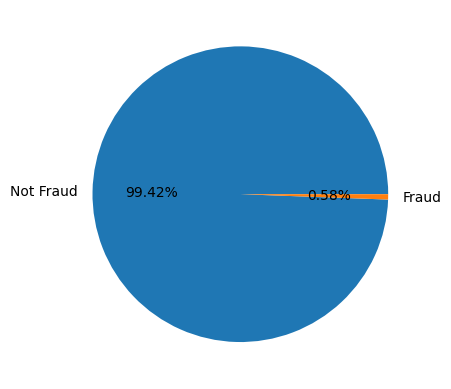

In [ ]:
plt.pie(df.is_fraud.value_counts(), labels=["Not Fraud","Fraud"], autopct="%0.2f%%")

In [ ]:
import plotly.express as px
df["is_fraud_str"] = df["is_fraud"].apply(lambda x : "Not Fraud" if x==0 else "Fraud")
fig = px.pie(df, names="is_fraud_str", title='Fraud vs Not Fraud')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df["trans_date_trans_time"] = pd.to_datetime(df.trans_date_trans_time)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [ ]:
df['time'] = df["trans_date_trans_time"].dt.time
df['time'].head()

,time
0,00:00:18
1,00:00:44
2,00:00:51
3,00:01:16
4,00:03:06


In [ ]:
df['date'] = df["trans_date_trans_time"].dt.date
df['date'].head()

,date
0,2019-01-01
1,2019-01-01
2,2019-01-01
3,2019-01-01
4,2019-01-01


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,is_fraud_str,time,date
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Not Fraud,00:00:18,2019-01-01
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Not Fraud,00:00:44,2019-01-01
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Not Fraud,00:00:51,2019-01-01
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Not Fraud,00:01:16,2019-01-01
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Not Fraud,00:03:06,2019-01-01


In [ ]:
df.drop(["trans_date_trans_time"], axis=1, inplace=True)

In [ ]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,is_fraud_str,time,date
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Not Fraud,00:00:18,2019-01-01
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Not Fraud,00:00:44,2019-01-01
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Not Fraud,00:00:51,2019-01-01
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Not Fraud,00:01:16,2019-01-01
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Not Fraud,00:03:06,2019-01-01


In [ ]:
fraud_trans = df.loc[df["is_fraud"]==1]
fraud_trans["time"].value_counts()

,count
time,
23:48:32,5
23:42:53,5
22:17:47,4
22:03:50,4
22:45:54,4
...,...
06:24:06,1
22:07:40,1
08:35:09,1


In [ ]:
fraud_trans = df.loc[df["is_fraud"]==1]
fraud_trans["date"].value_counts()

,count
date,
2019-02-25,50
2019-02-28,44
2019-02-12,44
2019-05-20,44
2019-06-29,43
...,...
2019-07-30,1
2019-10-22,1
2019-10-15,1


In [ ]:
df["category"].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [ ]:
cols_to_drop = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip','lat','long','city_pop','merch_lat','merch_long',]
df = df.drop(cols_to_drop, axis=1)

In [ ]:
df.head()

,category,amt,gender,city,state,job,dob,is_fraud,is_fraud_str,time,date
0,misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0,Not Fraud,00:00:18,2019-01-01
1,grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,1978-06-21,0,Not Fraud,00:00:44,2019-01-01
2,entertainment,220.11,M,Malad City,ID,Nature conservation officer,1962-01-19,0,Not Fraud,00:00:51,2019-01-01
3,gas_transport,45.00,M,Boulder,MT,Patent attorney,1967-01-12,0,Not Fraud,00:01:16,2019-01-01
4,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,0,Not Fraud,00:03:06,2019-01-01


In [ ]:
df.shape

(1296675, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   category      1296675 non-null  object 
 1   amt           1296675 non-null  float64
 2   gender        1296675 non-null  object 
 3   city          1296675 non-null  object 
 4   state         1296675 non-null  object 
 5   job           1296675 non-null  object 
 6   dob           1296675 non-null  object 
 7   is_fraud      1296675 non-null  int64  
 8   is_fraud_str  1296675 non-null  object 
 9   time          1296675 non-null  object 
 10  date          1296675 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 108.8+ MB


In [ ]:
df["date"] = pd.to_datetime(df.date)
df['dob'] = pd.to_datetime(df.dob)
df['age'] = df['date'] - df['dob']
df.head()

,category,amt,gender,city,state,job,dob,is_fraud,is_fraud_str,time,date,age
0,misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0,Not Fraud,00:00:18,2019-01-01,11255 days
1,grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,1978-06-21,0,Not Fraud,00:00:44,2019-01-01,14804 days
2,entertainment,220.11,M,Malad City,ID,Nature conservation officer,1962-01-19,0,Not Fraud,00:00:51,2019-01-01,20801 days
3,gas_transport,45.00,M,Boulder,MT,Patent attorney,1967-01-12,0,Not Fraud,00:01:16,2019-01-01,18982 days
4,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,0,Not Fraud,00:03:06,2019-01-01,11967 days


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype          
---  ------        --------------    -----          
 0   category      1296675 non-null  object         
 1   amt           1296675 non-null  float64        
 2   gender        1296675 non-null  object         
 3   city          1296675 non-null  object         
 4   state         1296675 non-null  object         
 5   job           1296675 non-null  object         
 6   dob           1296675 non-null  datetime64[ns] 
 7   is_fraud      1296675 non-null  int64          
 8   is_fraud_str  1296675 non-null  object         
 9   time          1296675 non-null  object         
 10  date          1296675 non-null  datetime64[ns] 
 11  age           1296675 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(7), timedelta64[ns](1)
memory usage: 118.7+ MB


In [ ]:
df['age_in_years'] = (df['age'] / pd.Timedelta(days=365)).astype(int)
df['age_str'] = df['age_in_years'].astype(str) + ' yrs'

df.head()

,category,amt,gender,city,state,job,dob,is_fraud,is_fraud_str,time,date,age,age_in_years,age_str
0,misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0,Not Fraud,00:00:18,2019-01-01,11255 days,30,30 yrs
1,grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,1978-06-21,0,Not Fraud,00:00:44,2019-01-01,14804 days,40,40 yrs
2,entertainment,220.11,M,Malad City,ID,Nature conservation officer,1962-01-19,0,Not Fraud,00:00:51,2019-01-01,20801 days,56,56 yrs
3,gas_transport,45.00,M,Boulder,MT,Patent attorney,1967-01-12,0,Not Fraud,00:01:16,2019-01-01,18982 days,52,52 yrs
4,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,0,Not Fraud,00:03:06,2019-01-01,11967 days,32,32 yrs


In [ ]:
drop_columns = ['city','job','dob','state']
df = df.drop(drop_columns, axis=1)

In [ ]:
df.head()

,category,amt,gender,is_fraud,is_fraud_str,time,date,age,age_in_years,age_str
0,misc_net,4.97,F,0,Not Fraud,00:00:18,2019-01-01,11255 days,30,30 yrs
1,grocery_pos,107.23,F,0,Not Fraud,00:00:44,2019-01-01,14804 days,40,40 yrs
2,entertainment,220.11,M,0,Not Fraud,00:00:51,2019-01-01,20801 days,56,56 yrs
3,gas_transport,45.00,M,0,Not Fraud,00:01:16,2019-01-01,18982 days,52,52 yrs
4,misc_pos,41.96,M,0,Not Fraud,00:03:06,2019-01-01,11967 days,32,32 yrs


In [ ]:
drop = ['age','age_str']
df = df.drop(drop, axis=1)

In [ ]:
df.head()

,category,amt,gender,is_fraud,is_fraud_str,time,date,age_in_years
0,misc_net,4.97,F,0,Not Fraud,00:00:18,2019-01-01,30
1,grocery_pos,107.23,F,0,Not Fraud,00:00:44,2019-01-01,40
2,entertainment,220.11,M,0,Not Fraud,00:00:51,2019-01-01,56
3,gas_transport,45.00,M,0,Not Fraud,00:01:16,2019-01-01,52
4,misc_pos,41.96,M,0,Not Fraud,00:03:06,2019-01-01,32


In [ ]:
encoder = pd.get_dummies(df.category,drop_first=True).astype(int)

In [ ]:
encoder.head()

,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = pd.concat([df, encoder], axis=1)
df.head()

,category,amt,gender,is_fraud,is_fraud_str,time,date,age_in_years,food_dining,gas_transport,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,misc_net,4.97,F,0,Not Fraud,00:00:18,2019-01-01,30,0,0,...,0,0,0,0,1,0,0,0,0,0
1,grocery_pos,107.23,F,0,Not Fraud,00:00:44,2019-01-01,40,0,0,...,1,0,0,0,0,0,0,0,0,0
2,entertainment,220.11,M,0,Not Fraud,00:00:51,2019-01-01,56,0,0,...,0,0,0,0,0,0,0,0,0,0
3,gas_transport,45.00,M,0,Not Fraud,00:01:16,2019-01-01,52,0,1,...,0,0,0,0,0,0,0,0,0,0
4,misc_pos,41.96,M,0,Not Fraud,00:03:06,2019-01-01,32,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.drop(["category"], axis=1, inplace=True)

In [ ]:
df.drop(["is_fraud_str"], axis=1, inplace=True)

In [ ]:
df.drop(["date"], axis=1, inplace=True)

In [ ]:
df.drop(["time"], axis=1, inplace=True)

In [ ]:
df.duplicated().sum

<bound method Series.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1296670    False
1296671    False
1296672    False
1296673    False
1296674    False
Length: 1296675, dtype: bool>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   amt             1296675 non-null  float64
 1   gender          1296675 non-null  object 
 2   is_fraud        1296675 non-null  int64  
 3   age_in_years    1296675 non-null  int64  
 4   food_dining     1296675 non-null  int64  
 5   gas_transport   1296675 non-null  int64  
 6   grocery_net     1296675 non-null  int64  
 7   grocery_pos     1296675 non-null  int64  
 8   health_fitness  1296675 non-null  int64  
 9   home            1296675 non-null  int64  
 10  kids_pets       1296675 non-null  int64  
 11  misc_net        1296675 non-null  int64  
 12  misc_pos        1296675 non-null  int64  
 13  personal_care   1296675 non-null  int64  
 14  shopping_net    1296675 non-null  int64  
 15  shopping_pos    1296675 non-null  int64  
 16  travel          1296675 non-null  in

In [ ]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

In [ ]:
df['is_fraud'] = df['is_fraud'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   amt             1296675 non-null  float64
 1   gender          1296675 non-null  int64  
 2   is_fraud        1296675 non-null  float64
 3   age_in_years    1296675 non-null  int64  
 4   food_dining     1296675 non-null  int64  
 5   gas_transport   1296675 non-null  int64  
 6   grocery_net     1296675 non-null  int64  
 7   grocery_pos     1296675 non-null  int64  
 8   health_fitness  1296675 non-null  int64  
 9   home            1296675 non-null  int64  
 10  kids_pets       1296675 non-null  int64  
 11  misc_net        1296675 non-null  int64  
 12  misc_pos        1296675 non-null  int64  
 13  personal_care   1296675 non-null  int64  
 14  shopping_net    1296675 non-null  int64  
 15  shopping_pos    1296675 non-null  int64  
 16  travel          1296675 non-null  in

In [ ]:
x = df.drop('is_fraud',axis=1)
y = df['is_fraud']
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
print("accuracy is :",Accuracy)

accuracy is : 0.993602868876164


In [ ]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    257815
         1.0       0.65      0.66      0.65      1520

    accuracy                           1.00    259335
   macro avg       0.82      0.83      0.82    259335
weighted avg       1.00      1.00      1.00    259335



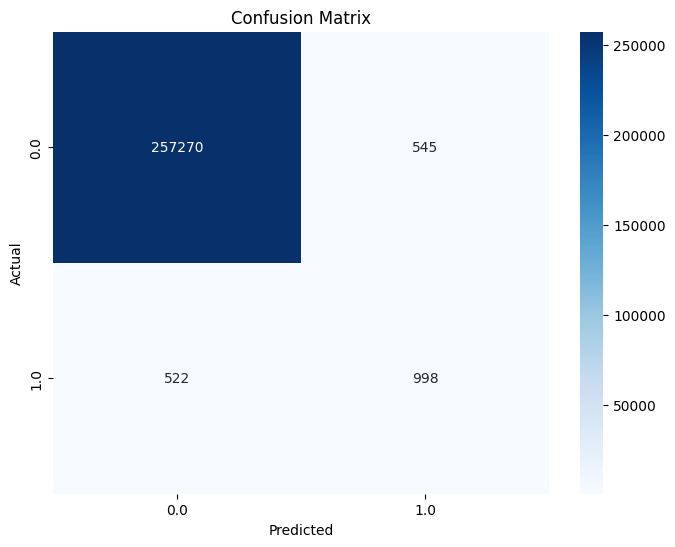

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df["is_fraud"] = df["is_fraud"].astype(int)
df["is_fraud_str"] = df["is_fraud"].apply(lambda x : "Not Fraud" if x==0 else "Fraud")

In [ ]:
df.head()

,amt,gender,is_fraud,age_in_years,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,is_fraud_str
0,4.97,0,0,30,0,0,0,0,0,0,0,1,0,0,0,0,0,Not Fraud
1,107.23,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,Not Fraud
2,220.11,1,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,Not Fraud
3,45.00,1,0,52,0,1,0,0,0,0,0,0,0,0,0,0,0,Not Fraud
4,41.96,1,0,32,0,0,0,0,0,0,0,0,1,0,0,0,0,Not Fraud


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    257815
         1.0       0.64      0.65      0.65      1520

    accuracy                           1.00    259335
   macro avg       0.82      0.83      0.82    259335
weighted avg       1.00      1.00      1.00    259335



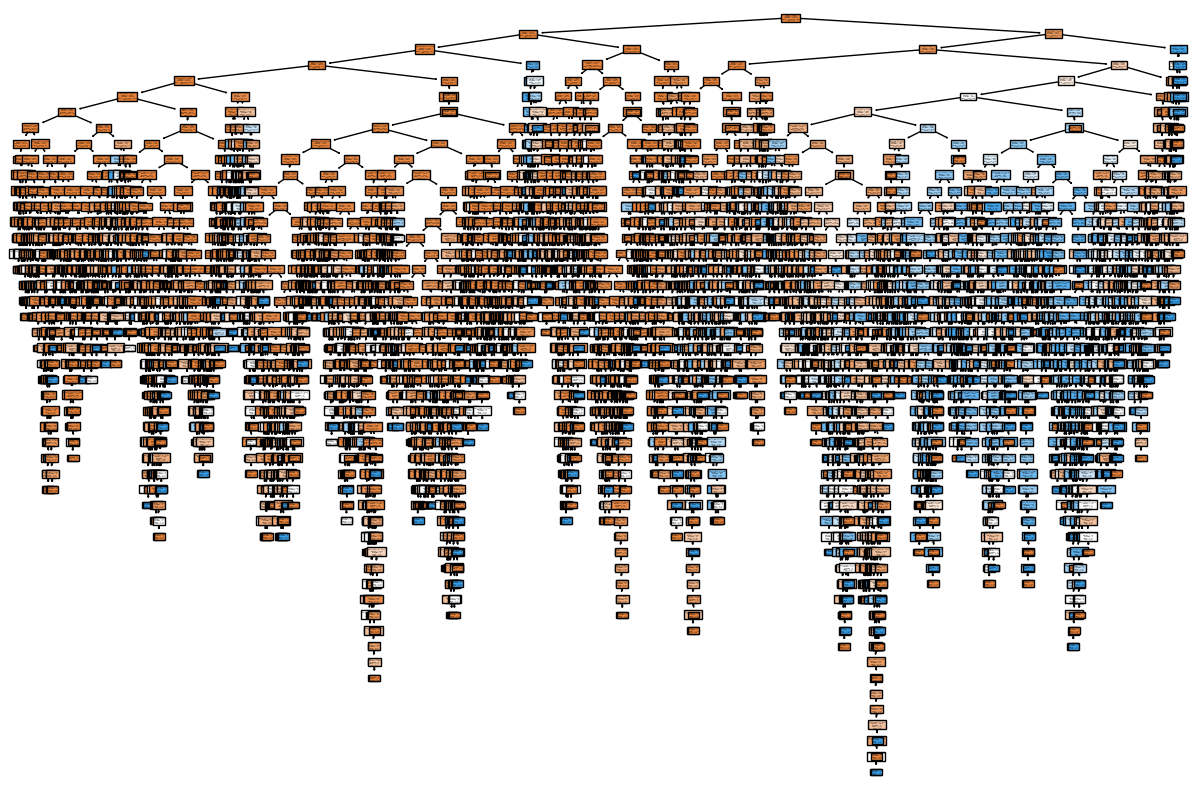

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train, y_train)
class_names_str = [str(cls) for cls in dt_model.classes_]
y_pred_dt = dt_model.predict(x_test)

print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=x.columns, class_names=class_names_str, filled=True)
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)
y_resampled.value_counts()

,count
is_fraud,
0.0,7506
1.0,7506


In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_resampled, y_resampled)
class_names_str = [str(cls) for cls in dt_model.classes_]
y_pred_dt = dt_model.predict(x_test)

print(classification_report(y_test, y_pred_dt))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94    257815
         1.0       0.00      0.08      0.01      1520

    accuracy                           0.89    259335
   macro avg       0.50      0.49      0.48    259335
weighted avg       0.99      0.89      0.94    259335



In [ ]:
Accuracy = accuracy_score(y_test,y_pred)
print("accuracy is :",Accuracy)

accuracy is : 0.9958856305550735


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)
y_smote.value_counts()

,count
is_fraud,
0.0,1289169
1.0,1289169


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_smote,y_smote)
y_pred = dt.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

[0. 0. 0. ... 0. 0. 0.]
0.8935006844429021


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94    257815
         1.0       0.00      0.08      0.01      1520

    accuracy                           0.89    259335
   macro avg       0.50      0.49      0.48    259335
weighted avg       0.99      0.89      0.94    259335



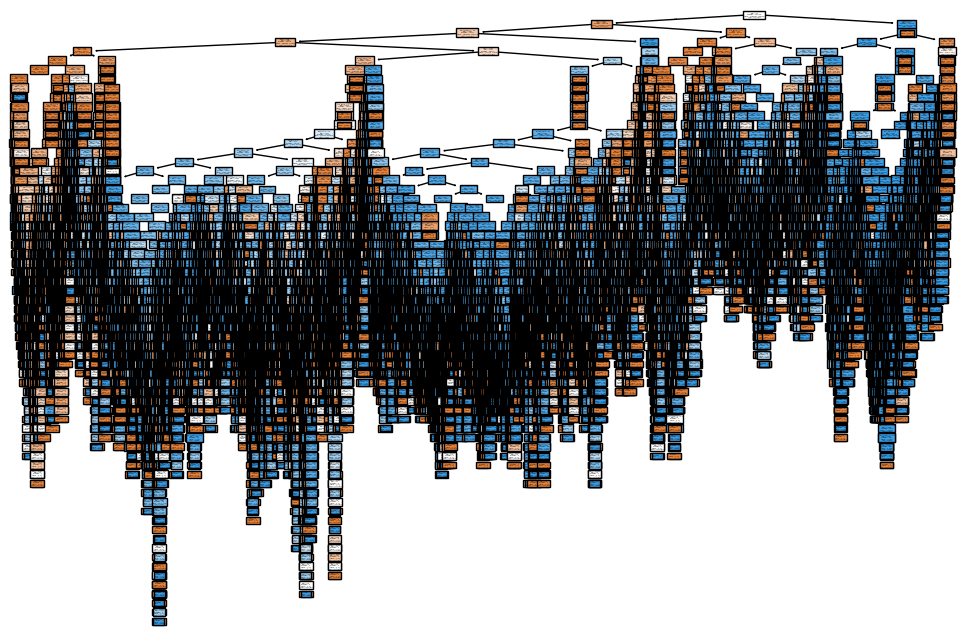

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=x.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()

In [ ]:
import random
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=1000, n_features=20, random_state=42)
trn_xs, val_xs, trn_y, val_y = train_test_split(x, y, test_size=0.2)
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.sample(range(n),int(n * prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs[idxs], trn_y[idxs])

In [ ]:
trees = []
for t in range(50):
    tr = get_tree()
    trees.append(tr)

In [ ]:
all_probs = []

for t in trees:
    all_probs.append(t.predict(val_xs))

avg_probs = np.stack(all_probs).mean(0)

mean_absolute_error(val_y, avg_probs)

0.11629999999999999

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
rf.fit(trn_xs, trn_y)

mean_absolute_error(val_y, rf.predict(val_xs))

0.09

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

feature_names = [f"feature_{i}" for i in range(30)]
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_model.fit(trn_xs, trn_y)

y_pred_dt = dt_model.predict(val_xs)
print(y_pred_dt)
print(classification_report(val_y, y_pred_dt))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


[0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.89      0.90      0.90       101

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



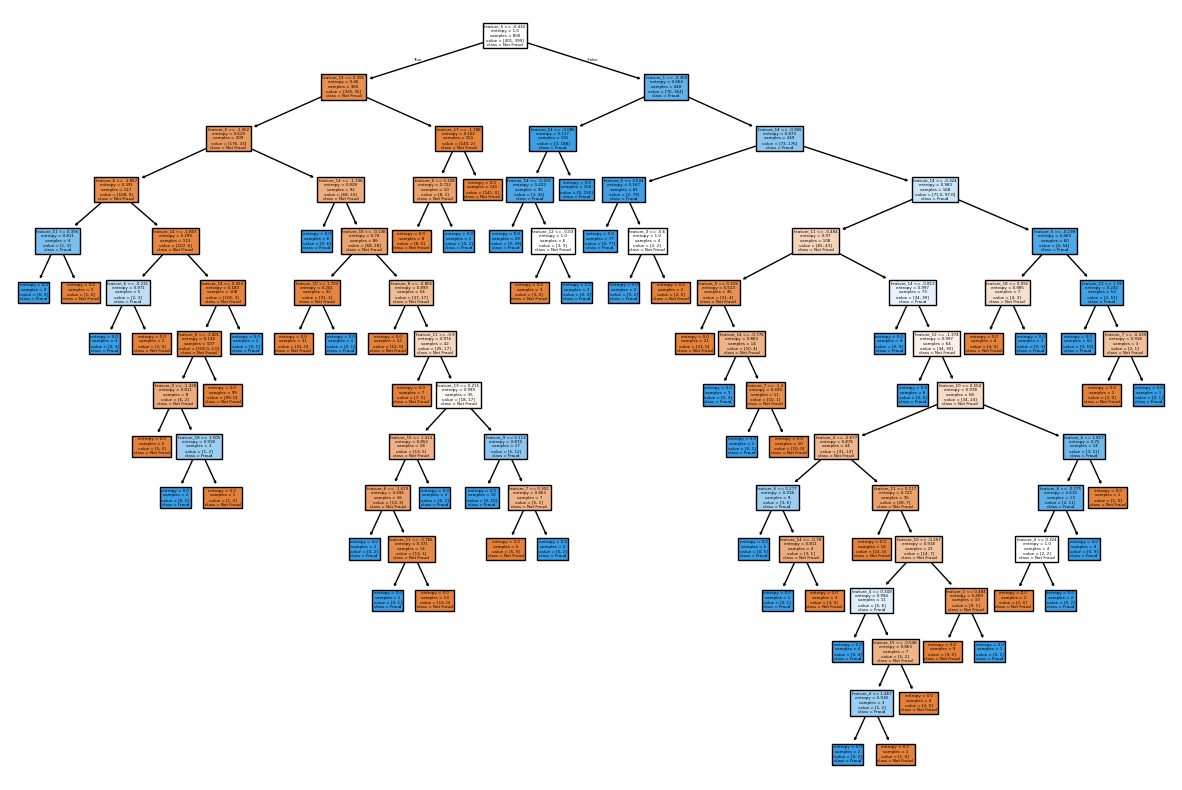

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=feature_names, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()

In [ ]:
rf.oob_score_

0.86625